# Installing some libraries

In [72]:
!conda update -y -n base conda
!conda update numpy -y
!python -m nltk.downloader all
!pip install xgboost

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /home/ec2-user/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/ec2-user/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /home/ec2-user/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]

[nltk_data]    |   Package smultron is already up-to-date!
[nltk_data]    | Downloading package state_union to
[nltk_data]    |     /home/ec2-user/nltk_data...
[nltk_data]    |   Package state_union is already up-to-date!
[nltk_data]    | Downloading package stopwords to
[nltk_data]    |     /home/ec2-user/nltk_data...
[nltk_data]    |   Package stopwords is already up-to-date!
[nltk_data]    | Downloading package subjectivity to
[nltk_data]    |     /home/ec2-user/nltk_data...
[nltk_data]    |   Package subjectivity is already up-to-date!
[nltk_data]    | Downloading package swadesh to
[nltk_data]    |     /home/ec2-user/nltk_data...
[nltk_data]    |   Package swadesh is already up-to-date!
[nltk_data]    | Downloading package switchboard to
[nltk_data]    |     /home/ec2-user/nltk_data...
[nltk_data]    |   Package switchboard is already up-to-date!
[nltk_data]    | Downloading package timit to
[nltk_data]    |     /home/ec2-user/nltk_data...
[nltk_data]    |   Package timit is alrea

# Transforming the dataset

In [73]:
%matplotlib inline

import pandas as pd
import numpy as np

In [74]:
df = pd.read_csv("datasets%2Ftrain2.csv")
df.head()

,opportunity_id,feat_cat_opportunity_program_name,feat_cat_institution,feat_cat_campus,feat_cat_account_person_city,feat_cat_account_person_state,feat_cat_opportunity_program_category_id,feat_cat_age,feat_cat_account_person_school_type_id,feat_cat_opportunity_entry_mode_id,feat_cat_created_first_account_last_cycle,feat_cat_account_person_sex_id,feat_cat_account_same_city_as_ies,feat_cat_account_distance_from_ies,feat_cat_opportunity_program_shift_id,feat_cat_days_to_the_end_of_cycle,feat_cat_applications_before,feat_cat_applications_on_previous_cycles,lab_cat_enrolled
0,0,DANCA,Unifavip | Wyden,Indianï¿½polis,CARUARU,PE,bacharelado,27,PUBLICO,enem,False,masculino,True,0,vespertino,90-200,True,False,1
1,1,DANCA,Unifavip | Wyden,Indianï¿½polis,OUTROS,PE,bacharelado,28+,PRIVADO,portador de diploma,False,Feminino,False,20-100,noturno,90-200,False,False,0
2,2,DANCA,Unifavip | Wyden,Indianï¿½polis,CARUARU,PE,bacharelado,23,PUBLICO,portador de diploma,True,Feminino,True,1,noturno,90-200,False,False,1
3,3,DANCA,Unifavip | Wyden,Indianï¿½polis,OUTROS,PE,bacharelado,28+,PUBLICO,portador de diploma,True,masculino,False,20-100,noturno,90-200,False,True,1
4,4,DANCA,UniMetrocamp | Wyden,Campinas,OUTROS,OUTRO,bacharelado,19,PUBLICO,enem,False,Feminino,True,0,matutino,70-80,True,False,1


In [4]:
df.describe()

,opportunity_id,lab_cat_enrolled
count,35387.000000,35387.000000
mean,17693.000000,0.500551
std,10215.491324,0.500007
min,0.000000,0.000000
25%,8846.500000,0.000000
50%,17693.000000,1.000000
75%,26539.500000,1.000000
max,35386.000000,1.000000


# Getting some insights

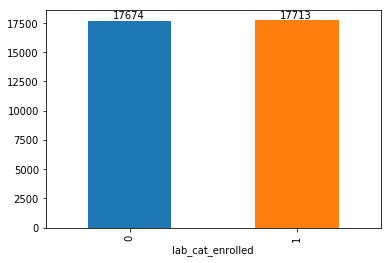

In [4]:
ax = df.groupby(df["lab_cat_enrolled"])["lab_cat_enrolled"].count().plot(kind='bar')
x_offset = -0.1
y_offset = 200
for p in ax.patches:
    b = p.get_bbox()
    val = "{}".format(int(b.y1 + b.y0))        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))

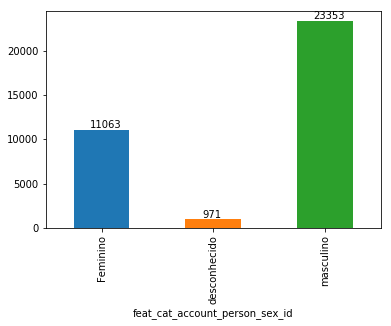

In [5]:
ax = df.groupby(df["feat_cat_account_person_sex_id"])["feat_cat_account_person_sex_id"].count().plot(kind='bar')
x_offset = -0.1
y_offset = 200
for p in ax.patches:
    b = p.get_bbox()
    val = "{}".format(int(b.y1 + b.y0))        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))

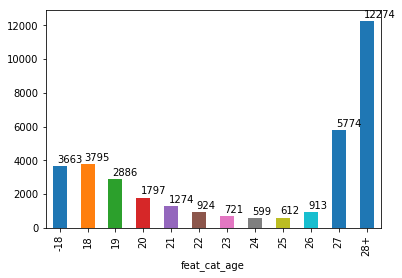

In [6]:
ax = df.groupby(df["feat_cat_age"])["feat_cat_age"].count().plot(kind='bar')
x_offset = -0.1
y_offset = 200
for p in ax.patches:
    b = p.get_bbox()
    val = "{}".format(int(b.y1 + b.y0))        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))

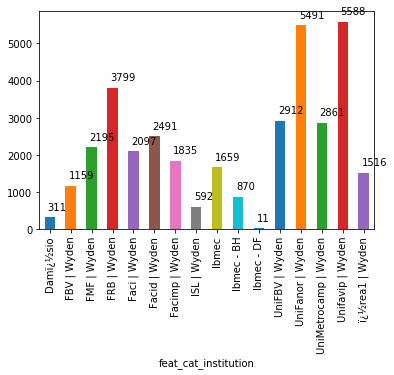

In [7]:
ax = df.groupby(df["feat_cat_institution"])["feat_cat_institution"].count().plot(kind='bar')
x_offset = -0.1
y_offset = 200
for p in ax.patches:
    b = p.get_bbox()
    val = "{}".format(int(b.y1 + b.y0))        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))

In [75]:
d = pd.read_csv("datasets%2Ftrain2.csv")
d.head()
df2=d

In [76]:
df2 = pd.DataFrame()

for n in ["feat_cat_opportunity_program_name","feat_cat_age","feat_cat_account_distance_from_ies","feat_cat_institution", "feat_cat_campus", 
          "feat_cat_account_person_city", "feat_cat_account_person_state", "feat_cat_opportunity_program_category_id", "feat_cat_opportunity_entry_mode_id", "feat_cat_created_first_account_last_cycle",
         "feat_cat_account_person_school_type_id", "feat_cat_account_person_sex_id", "feat_cat_account_same_city_as_ies", 
          "feat_cat_opportunity_program_shift_id", "feat_cat_days_to_the_end_of_cycle", "feat_cat_applications_before", "feat_cat_applications_on_previous_cycles", "lab_cat_enrolled"]:
    df2[n] = d[n].astype('category').cat.codes


In [77]:
df2.head()

,feat_cat_opportunity_program_name,feat_cat_age,feat_cat_account_distance_from_ies,feat_cat_institution,feat_cat_campus,feat_cat_account_person_city,feat_cat_account_person_state,feat_cat_opportunity_program_category_id,feat_cat_opportunity_entry_mode_id,feat_cat_created_first_account_last_cycle,feat_cat_account_person_school_type_id,feat_cat_account_person_sex_id,feat_cat_account_same_city_as_ies,feat_cat_opportunity_program_shift_id,feat_cat_days_to_the_end_of_cycle,feat_cat_applications_before,feat_cat_applications_on_previous_cycles,lab_cat_enrolled
0,13,10,0,14,14,3,7,0,0,0,1,2,1,4,8,1,0,1
1,13,11,13,14,14,9,7,0,2,0,0,0,0,2,8,0,0,0
2,13,6,1,14,14,3,7,0,2,1,1,0,1,2,8,0,0,1
3,13,11,13,14,14,9,7,0,2,1,1,2,0,2,8,0,1,1
4,13,2,0,13,5,9,4,0,0,0,1,0,1,1,6,1,0,1


## Age histogram

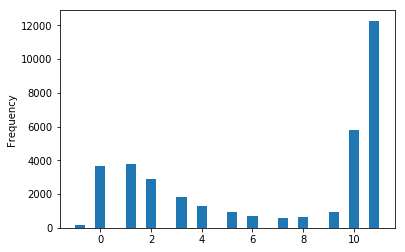

In [11]:
df2['feat_cat_age'].plot(bins=30,kind = 'hist')

## Age histogram by student type

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f351a8c0e80>,
      dtype=object)

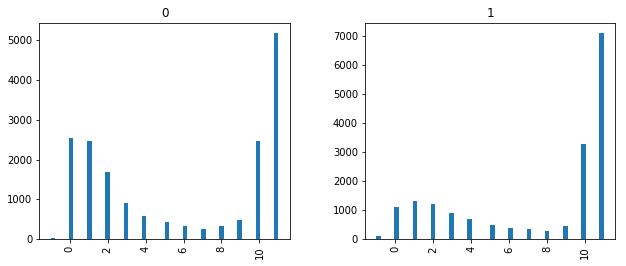

In [12]:
df2.hist(column='feat_cat_age',by='lab_cat_enrolled',bins=50,figsize = (10,4))

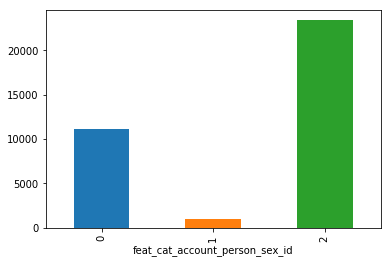

In [13]:
df2.groupby(df2.feat_cat_account_person_sex_id)["lab_cat_enrolled"].count().plot(kind="bar", x="feat_cat_account_person_sex_id", y="lab_cat_enrolled")

## Correlation matrix (Not use)

In [14]:
import seaborn as sns

f, ax = plt.subplots(figsize=(15, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

NameError: name 'plt' is not defined

NameError: name 'plt' is not defined

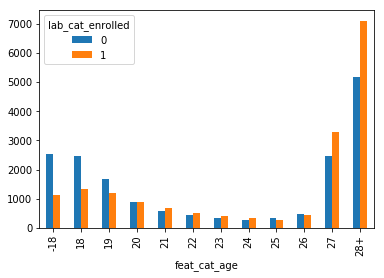

In [78]:
%matplotlib inline
pd.crosstab(df.feat_cat_age, df["lab_cat_enrolled"]).plot(kind='bar')
plt.title('feat_cat_age')
plt.xlabel('feat_cat_age')
plt.ylabel('lab_cat_enrolled')
#plt.savefig('purchase_fre_job')

In [79]:
df2.describe()

,feat_cat_opportunity_program_name,feat_cat_age,feat_cat_account_distance_from_ies,feat_cat_institution,feat_cat_campus,feat_cat_account_person_city,feat_cat_account_person_state,feat_cat_opportunity_program_category_id,feat_cat_opportunity_entry_mode_id,feat_cat_created_first_account_last_cycle,feat_cat_account_person_school_type_id,feat_cat_account_person_sex_id,feat_cat_account_same_city_as_ies,feat_cat_opportunity_program_shift_id,feat_cat_days_to_the_end_of_cycle,feat_cat_applications_before,feat_cat_applications_on_previous_cycles,lab_cat_enrolled
count,35387.000000,35387.000000,35387.000000,35387.000000,35387.000000,35387.000000,35387.000000,35387.000000,35387.000000,35387.000000,35387.000000,35387.000000,35387.000000,35387.000000,35387.000000,35387.000000,35387.000000,35387.000000
mean,28.279396,6.751208,12.617232,8.767174,9.972617,8.119083,3.990335,0.293752,3.135332,0.285359,0.759460,1.347303,0.560262,1.661373,5.152316,0.211462,0.259333,0.500551
std,19.148793,4.426135,6.536799,4.621308,4.999911,2.771178,2.507000,0.676520,2.112669,0.451592,0.443703,0.923020,0.496362,0.861178,2.508613,0.408351,0.438275,0.500007
min,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,9.000000,4.000000,6.000000,8.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000
50%,26.000000,10.000000,13.000000,11.000000,11.000000,9.000000,4.000000,0.000000,3.000000,0.000000,1.000000,2.000000,1.000000,2.000000,5.000000,0.000000,0.000000,1.000000
75%,38.000000,11.000000,18.000000,13.000000,14.000000,9.000000,7.000000,0.000000,5.000000,1.000000,1.000000,2.000000,1.000000,2.000000,8.000000,0.000000,1.000000,1.000000
max,71.000000,11.000000,21.000000,15.000000,17.000000,13.000000,8.000000,2.000000,6.000000,1.000000,2.000000,2.000000,1.000000,4.000000,8.000000,1.000000,1.000000,1.000000


In [80]:
df3 = pd.read_csv("datasets%2Feval2.csv")
df3.head()

,opportunity_id,feat_cat_opportunity_program_name,feat_cat_institution,feat_cat_campus,feat_cat_account_person_city,feat_cat_account_person_state,feat_cat_opportunity_program_category_id,feat_cat_age,feat_cat_account_person_school_type_id,feat_cat_opportunity_entry_mode_id,feat_cat_created_first_account_last_cycle,feat_cat_account_person_sex_id,feat_cat_account_same_city_as_ies,feat_cat_account_distance_from_ies,feat_cat_opportunity_program_shift_id,feat_cat_days_to_the_end_of_cycle,feat_cat_applications_before,feat_cat_applications_on_previous_cycles,lab_cat_enrolled
0,1,NAO IDENTIFICADO,Ibmec,Barra,OUTROS,OUTRO,nao identificado,23,PRIVADO,vestibular tradicional,False,masculino,True,10,NaN,90-200,False,False,0
1,2,NAO IDENTIFICADO,Ibmec,Barra,OUTROS,OUTRO,nao identificado,-18,PRIVADO,vestibular tradicional,False,masculino,True,16,NaN,90-200,False,False,0
2,3,NAO IDENTIFICADO,Ibmec,Barra,OUTROS,OUTRO,nao identificado,27,PRIVADO,vestibular tradicional,False,Feminino,True,20-100,NaN,90-200,False,False,0
3,4,NAO IDENTIFICADO,Ibmec,Barra,OUTROS,OUTRO,nao identificado,18,PRIVADO,vestibular tradicional,False,Feminino,True,20-100,NaN,80-90,True,False,1
4,5,NAO IDENTIFICADO,Ibmec,Barra,OUTROS,OUTRO,nao identificado,18,PUBLICO,vestibular tradicional,True,Feminino,True,20-100,NaN,90-200,True,True,1


In [ ]:
df3.describe()

In [9]:
df4=df3
df4.describe()

,opportunity_id,lab_cat_enrolled
count,15114.000000,15114.00000
mean,7557.500000,0.50258
std,4363.180319,0.50001
min,1.000000,0.00000
25%,3779.250000,0.00000
50%,7557.500000,1.00000
75%,11335.750000,1.00000
max,15114.000000,1.00000


In [81]:
df4 = pd.DataFrame()

for m in ["feat_cat_opportunity_program_name","feat_cat_age","feat_cat_account_distance_from_ies","feat_cat_institution",
          "feat_cat_campus", "feat_cat_account_person_city", "feat_cat_account_person_state", 
          "feat_cat_opportunity_program_category_id", "feat_cat_opportunity_entry_mode_id", 
          "feat_cat_created_first_account_last_cycle","feat_cat_account_person_school_type_id", 
          "feat_cat_account_person_sex_id", "feat_cat_account_same_city_as_ies", "feat_cat_opportunity_program_shift_id", 
          "feat_cat_days_to_the_end_of_cycle", "feat_cat_applications_before", "feat_cat_applications_on_previous_cycles",
          "lab_cat_enrolled"]: df4[m] = df3[m].astype('category').cat.codes


In [82]:
df4.head()

,feat_cat_opportunity_program_name,feat_cat_age,feat_cat_account_distance_from_ies,feat_cat_institution,feat_cat_campus,feat_cat_account_person_city,feat_cat_account_person_state,feat_cat_opportunity_program_category_id,feat_cat_opportunity_entry_mode_id,feat_cat_created_first_account_last_cycle,feat_cat_account_person_school_type_id,feat_cat_account_person_sex_id,feat_cat_account_same_city_as_ies,feat_cat_opportunity_program_shift_id,feat_cat_days_to_the_end_of_cycle,feat_cat_applications_before,feat_cat_applications_on_previous_cycles,lab_cat_enrolled
0,52,6,2,8,2,9,4,1,6,0,0,2,1,-1,8,0,0,0
1,52,0,8,8,2,9,4,1,6,0,0,2,1,-1,8,0,0,0
2,52,10,13,8,2,9,4,1,6,0,0,0,1,-1,8,0,0,0
3,52,1,13,8,2,9,4,1,6,0,0,0,1,-1,7,1,0,1
4,52,1,13,8,2,9,4,1,6,1,1,0,1,-1,8,1,1,1


In [83]:
df4.describe()

,feat_cat_opportunity_program_name,feat_cat_age,feat_cat_account_distance_from_ies,feat_cat_institution,feat_cat_campus,feat_cat_account_person_city,feat_cat_account_person_state,feat_cat_opportunity_program_category_id,feat_cat_opportunity_entry_mode_id,feat_cat_created_first_account_last_cycle,feat_cat_account_person_school_type_id,feat_cat_account_person_sex_id,feat_cat_account_same_city_as_ies,feat_cat_opportunity_program_shift_id,feat_cat_days_to_the_end_of_cycle,feat_cat_applications_before,feat_cat_applications_on_previous_cycles,lab_cat_enrolled
count,15114.000000,15114.000000,15114.000000,15114.000000,15114.000000,15114.000000,15114.000000,15114.000000,15114.000000,15114.000000,15114.000000,15114.000000,15114.000000,15114.000000,15114.000000,15114.000000,15114.000000,15114.00000
mean,26.552203,6.726545,12.639341,8.749636,9.970557,8.166667,3.957589,0.291187,3.115919,0.280138,0.758899,1.341538,0.566296,1.665410,5.175136,0.209805,0.255260,0.50258
std,17.922573,4.428115,6.532579,4.636304,5.047632,2.724535,2.516272,0.671837,2.128862,0.449081,0.442216,0.926355,0.495602,0.873792,2.513214,0.407183,0.436022,0.50001
min,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.00000
25%,16.000000,2.000000,9.000000,4.000000,6.000000,8.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.00000
50%,24.000000,10.000000,13.000000,11.000000,11.000000,9.000000,4.000000,0.000000,3.000000,0.000000,1.000000,2.000000,1.000000,2.000000,5.000000,0.000000,0.000000,1.00000
75%,36.000000,11.000000,17.000000,13.000000,14.000000,9.000000,7.000000,0.000000,5.000000,1.000000,1.000000,2.000000,1.000000,2.000000,8.000000,0.000000,1.000000,1.00000
max,67.000000,11.000000,21.000000,15.000000,17.000000,13.000000,8.000000,2.000000,6.000000,1.000000,2.000000,2.000000,1.000000,4.000000,8.000000,1.000000,1.000000,1.00000


In [84]:
%%time

from sklearn.model_selection import train_test_split
    
X = df4.drop('lab_cat_enrolled', axis=1).values
y = df4["lab_cat_enrolled"].values.astype(int)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.99959, random_state=42, stratify=y)



CPU times: user 12 ms, sys: 0 ns, total: 12 ms
Wall time: 12.7 ms


In [85]:
X_train1.shape, y_train1.shape

((6, 17), (6,))

In [86]:
X_test1.shape, y_test1.shape

((15108, 17), (15108,))

# Dataset preparation ( Apenas se eu quiser dividir meu arquivo)

In [87]:
%%time
from sklearn.model_selection import train_test_split
    
X = df2.drop('lab_cat_enrolled', axis=1).values
y = df2["lab_cat_enrolled"].values.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.0001, random_state=42, stratify=y)

CPU times: user 24 ms, sys: 0 ns, total: 24 ms
Wall time: 20.8 ms


In [88]:
X_train.shape, y_train.shape

((35383, 17), (35383,))

In [89]:
X_test.shape, y_test.shape

((4, 17), (4,))

# Some local experiments

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np


In [91]:
## Redes Neurais
##neuralnet = MLPClassifier()
neuralnet = MLPClassifier (activation='relu', solver='sgd', alpha=1e-5, hidden_layer_sizes=(200, 100, 80),
                           max_iter=100000)
                           
#Feature Scaling - Padronizando
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test1 = scaler.transform(X_test1)

neuralnet.fit(X_train, y_train)

##MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto',
##              beta_1=0.9, beta_2=0.999, early_stopping=False,
 ##             epsilon=1e-08, hidden_layer_sizes=(5, 2),
   ##           learning_rate='constant', learning_rate_init=0.001,
     ##         max_iter=200, momentum=0.9, n_iter_no_change=10,
       ##       nesterovs_momentum=True, power_t=0.5, random_state=1,
         ##     shuffle=True, tol=0.0001,
           ##   validation_fraction=0.1, verbose=False, warm_start=False)


y_pred = neuralnet.predict(X_test1)
print('Accuracy of Redes Neurais classifier on test set: {:.2f}'.format(neuralnet.score(X_test1, y_test1)))

cf_m = confusion_matrix(y_test1.tolist(), y_pred.tolist())
print(cf_m)
print(classification_report(y_test1, y_pred))

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Accuracy of Redes Neurais classifier on test set: 0.69
[[5009 2506]
 [2214 5379]]
             precision    recall  f1-score   support

          0       0.69      0.67      0.68      7515
          1       0.68      0.71      0.70      7593

avg / total       0.69      0.69      0.69     15108



In [ ]:
## SVM
logreg = svm.SVC()

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of LogisticRegression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

cf_m = confusion_matrix(y_test.tolist(), y_pred.tolist())
print(cf_m)
print(classification_report(y_test, y_pred))

In [ ]:
## Regressão Logistica
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of LogisticRegression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

cf_m = confusion_matrix(y_test.tolist(), y_pred.tolist())
print(cf_m)
print(classification_report(y_test, y_pred))

In [ ]:
## XGBClassifier
logreg = XGBClassifier()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of XGBClassifier classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

cf_m = confusion_matrix(y_test.tolist(), y_pred.tolist())
print(cf_m)
print(classification_report(y_test, y_pred))

In [ ]:
logreg = RandomForestClassifier()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of RandomForestClassifier classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

cf_m = confusion_matrix(y_test.tolist(), y_pred.tolist())
print(cf_m)
print(classification_report(y_test, y_pred))

# Now with cross validation

In [ ]:
kfold = model_selection.KFold(n_splits=10, random_state=7)

In [ ]:
modelCV = LogisticRegression()
scoring = 'f1'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("LogisticRegression 10-fold cross validation average accuracy: %.3f" % (results.mean()))

In [ ]:
modelCV = XGBClassifier()
scoring = 'f1'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("XGBClassifier 10-fold cross validation average accuracy: %.3f" % (results.mean()))

In [ ]:
modelCV = RandomForestClassifier()
scoring = 'f1'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("RandomForestClassifier 10-fold cross validation average accuracy: %.3f" % (results.mean()))

# Now let's train some XGBoost for classification

In [92]:
%%time

X = df2.drop('lab_cat_enrolled', axis=1).values.tolist()
y = df2["lab_cat_enrolled"].values.astype(int).tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.0001, random_state=42, stratify=y)

with open('opp_train.csv', 'w') as csv:
    for x_,y_ in zip(X_train, y_train):
        line = "%s,%s" % (y_, ",".join( list(map(str, x_)) ) )
        csv.write( line + "\n" )
    csv.flush()
    csv.close()

with open('opp_test.csv', 'w') as csv:
    for x_,y_ in zip(X_test, y_test):
        line = "%s,%s" % (y_, ",".join( list(map(str, x_)) ) )
        csv.write( line + "\n" )
    csv.flush()
    csv.close()

CPU times: user 376 ms, sys: 4 ms, total: 380 ms
Wall time: 220 ms


In [93]:
opp = pd.read_csv("opp_train.csv")

In [94]:
opp.describe()

,1,14,2,8,8.1,2.1,9,4,0,6,1.1,0.1,2.2,1.2,0.2,1.3,0.3,1.4
count,35382.000000,35382.000000,35382.000000,35382.000000,35382.000000,35382.000000,35382.000000,35382.000000,35382.000000,35382.000000,35382.000000,35382.000000,35382.000000,35382.000000,35382.000000,35382.000000,35382.000000,35382.000000
mean,0.500537,28.279436,6.751145,12.616839,8.767396,9.972811,8.119157,3.990532,0.293737,3.135351,0.285343,0.759482,1.347239,0.560257,1.661466,5.152592,0.211463,0.259341
std,0.500007,19.148121,4.426098,6.536949,4.621466,4.999844,2.771289,2.507093,0.676500,2.112698,0.451584,0.443692,0.923057,0.496363,0.861170,2.508622,0.408352,0.438279
min,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
25%,0.000000,16.000000,2.000000,9.000000,4.000000,6.000000,8.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000
50%,1.000000,26.000000,10.000000,13.000000,11.000000,11.000000,9.000000,4.000000,0.000000,3.000000,0.000000,1.000000,2.000000,1.000000,2.000000,5.000000,0.000000,0.000000
75%,1.000000,38.000000,11.000000,18.000000,13.000000,14.000000,9.000000,7.000000,0.000000,5.000000,1.000000,1.000000,2.000000,1.000000,2.000000,8.000000,0.000000,1.000000
max,1.000000,71.000000,11.000000,21.000000,15.000000,17.000000,13.000000,8.000000,2.000000,6.000000,1.000000,2.000000,2.000000,1.000000,4.000000,8.000000,1.000000,1.000000


In [95]:
%%time

X = df4.drop('lab_cat_enrolled', axis=1).values.tolist()
y = df4["lab_cat_enrolled"].values.astype(int).tolist()

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.99959, random_state=42, stratify=y)

with open('opp_train1.csv', 'w') as csv:
    for x_,y_ in zip(X_train1, y_train1):
        line = "%s,%s" % (y_, ",".join( list(map(str, x_)) ) )
        csv.write( line + "\n" )
    csv.flush()
    csv.close()

with open('opp_test1.csv', 'w') as csv:
    for x_,y_ in zip(X_test1, y_test1):
        line = "%s,%s" % (y_, ",".join( list(map(str, x_)) ) )
        csv.write( line + "\n" )
    csv.flush()
    csv.close()

CPU times: user 88 ms, sys: 0 ns, total: 88 ms
Wall time: 87.4 ms


In [96]:
opp1 = pd.read_csv("opp_test1.csv")
opp1.describe()

,1,27,11,5,7,4,12,3,0,3.1,0.1,1.1,2,0.2,1.2,5.1,0.3,0.4
count,15107.000000,15107.000000,15107.000000,15107.000000,15107.000000,15107.000000,15107.000000,15107.000000,15107.000000,15107.000000,15107.000000,15107.000000,15107.000000,15107.000000,15107.000000,15107.000000,15107.000000,15107.000000
mean,0.502548,26.548620,6.726352,12.638578,8.749719,9.970477,8.166281,3.957702,0.290991,3.115907,0.280201,0.758854,1.341630,0.566360,1.665519,5.175018,0.209704,0.255312
std,0.500010,17.919763,4.428184,6.531942,4.636707,5.048060,2.724500,2.516357,0.671664,2.128813,0.449112,0.442250,0.926315,0.495593,0.873915,2.513452,0.407111,0.436051
min,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
25%,0.000000,16.000000,2.000000,9.000000,4.000000,6.000000,8.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000
50%,1.000000,24.000000,10.000000,13.000000,11.000000,11.000000,9.000000,4.000000,0.000000,3.000000,0.000000,1.000000,2.000000,1.000000,2.000000,5.000000,0.000000,0.000000
75%,1.000000,36.000000,11.000000,17.000000,13.000000,14.000000,9.000000,7.000000,0.000000,5.000000,1.000000,1.000000,2.000000,1.000000,2.000000,8.000000,0.000000,1.000000
max,1.000000,67.000000,11.000000,21.000000,15.000000,17.000000,13.000000,8.000000,2.000000,6.000000,1.000000,2.000000,2.000000,1.000000,4.000000,8.000000,1.000000,1.000000


In [97]:
import sagemaker
import boto3

from sagemaker import get_execution_role
from sklearn.model_selection import train_test_split

role = get_execution_role()

prefix = 'adtalem/opportunity'
# Retrieve the default bucket
sagemaker_session = sagemaker.Session()
bucket = sagemaker_session.default_bucket()

INFO:sagemaker:Created S3 bucket: sagemaker-us-east-1-456509196269


In [98]:
input_train = sagemaker_session.upload_data(path='opp_train.csv', key_prefix='data/opportunity')
input_test = sagemaker_session.upload_data(path='opp_test1.csv', key_prefix='data/opportunity')

In [99]:
train_data = sagemaker.session.s3_input(s3_data=input_train,content_type="csv")
test_data = sagemaker.session.s3_input(s3_data=input_test,content_type="csv")

In [100]:
containers = {'us-west-2': '433757028032.dkr.ecr.us-west-2.amazonaws.com/xgboost:latest',
              'us-east-1': '811284229777.dkr.ecr.us-east-1.amazonaws.com/xgboost:latest',
              'us-east-2': '825641698319.dkr.ecr.us-east-2.amazonaws.com/xgboost:latest',
              'eu-west-1': '685385470294.dkr.ecr.eu-west-1.amazonaws.com/xgboost:latest'}

xgb = sagemaker.estimator.Estimator(containers[boto3.Session().region_name],
                                    role, 
                                    train_instance_count=1, 
                                    train_instance_type='ml.m4.xlarge',
                                    output_path='s3://{}/{}/output'.format(bucket, prefix),
                                    sagemaker_session=sagemaker_session)
xgb.set_hyperparameters(eta=0.1,
                        max_depth=10,
                        gamma=4,
                        reg_lambda=10,
                        alpha=10,
                        min_child_weight=6,
                        silent=0,
                        objective='binary:logistic',
                        num_round=30)

In [101]:
%%time
xgb.fit({'train': train_data, 'validation': test_data, })

INFO:sagemaker:Creating training-job with name: xgboost-2018-10-10-20-41-46-406


2018-10-10 20:41:46 Starting - Starting the training job...
Launching requested ML instances......
Preparing the instances for training......
2018-10-10 20:44:12 Downloading - Downloading input data...
2018-10-10 20:44:25 Training - Training image download completed. Training in progress..
Arguments: train
[2018-10-10:20:44:46:INFO] Running standalone xgboost training.
[2018-10-10:20:44:46:INFO] File size need to be processed in the node: 1.89mb. Available memory size in the node: 8603.82mb
[2018-10-10:20:44:46:INFO] Determined delimiter of CSV input is ','
[20:44:46] S3DistributionType set as FullyReplicated
[20:44:46] 35383x17 matrix with 601511 entries loaded from /opt/ml/input/data/train?format=csv&label_column=0&delimiter=,
[2018-10-10:20:44:46:INFO] Determined delimiter of CSV input is ','
[20:44:46] S3DistributionType set as FullyReplicated
[20:44:46] 15108x17 matrix with 256836 entries loaded from /opt/ml/input/data/validation?format=csv&label_column=0&delimiter=,
[20:44:46] sr

In [102]:
%%time

xgb_predictor = xgb.deploy(initial_instance_count=1, instance_type='ml.m4.xlarge')

INFO:sagemaker:Creating model with name: xgboost-2018-10-10-20-45-28-515
INFO:sagemaker:Creating endpoint with name xgboost-2018-10-10-20-41-46-406


-----------------------------------------------------------------------!CPU times: user 300 ms, sys: 24 ms, total: 324 ms
Wall time: 6min


In [103]:
from sagemaker.predictor import csv_serializer
from sklearn.metrics import f1_score

xgb_predictor.content_type = 'text/csv'
xgb_predictor.serializer = csv_serializer
xgb_predictor.deserializer = None

In [104]:
def xg_f1(y,t):
    y_bin = [1. if float(y_cont) > 0.5 else 0. for y_cont in y] # binaryzing your output
    return 'f1',f1_score(t,y_bin)

In [105]:
predictions_test = [ xgb_predictor.predict(x).decode('utf-8') for x in X_test1] 

In [106]:
xg_f1(predictions_test, y_test1)

('f1', 0.7223384776353649)

In [107]:
predictions_train = [ xgb_predictor.predict(x).decode('utf-8') for x in X_train]

KeyboardInterrupt: 

In [ ]:
xg_f1(predictions_train, y_train)

In [ ]:
predictions_test

In [ ]:
predictions_train

In [113]:
tocsv = predictions_test
tocsv

['0.597935557365',
 '0.727732419968',
 '0.609273612499',
 '0.406524389982',
 '0.299141615629',
 '0.244441434741',
 '0.612607896328',
 '0.816869080067',
 '0.15692217648',
 '0.888801932335',
 '0.767694115639',
 '0.0763478428125',
 '0.267500579357',
 '0.874688923359',
 '0.570345401764',
 '0.367226839066',
 '0.868808090687',
 '0.427066087723',
 '0.271271824837',
 '0.472883015871',
 '0.500305354595',
 '0.880665302277',
 '0.418326020241',
 '0.891865432262',
 '0.470048576593',
 '0.652417242527',
 '0.721687495708',
 '0.150884076953',
 '0.639928340912',
 '0.798600196838',
 '0.29043751955',
 '0.721218824387',
 '0.658548295498',
 '0.751449584961',
 '0.406113058329',
 '0.509336054325',
 '0.63990598917',
 '0.276383280754',
 '0.803899943829',
 '0.240421026945',
 '0.37129560113',
 '0.2638040483',
 '0.0762718468904',
 '0.819552958012',
 '0.31664276123',
 '0.865655958652',
 '0.737064182758',
 '0.839132606983',
 '0.895718514919',
 '0.67133051157',
 '0.485327541828',
 '0.143477171659',
 '0.325399458408',

# HPO

In [49]:
from sagemaker.tuner import IntegerParameter, CategoricalParameter, ContinuousParameter, HyperparameterTuner

hyperparameter_ranges = {'eta': ContinuousParameter(0, 1),
                        'min_child_weight': ContinuousParameter(1, 10),
                        'alpha': ContinuousParameter(0, 2),
                         'gamma': ContinuousParameter(0, 10),
                        'max_depth': IntegerParameter(1, 10)}

objective_metric_name = 'validation:error'

tuner = HyperparameterTuner(xgb,
                            objective_metric_name,
                            hyperparameter_ranges,
                            max_jobs=20,
                            max_parallel_jobs=3,
                            objective_type='Minimize')

tuner.fit({'train': train_data, 'validation': test_data, })

INFO:sagemaker:Creating hyperparameter tuning job with name: xgboost-181008-1506


In [ ]:
boto3.client('sagemaker').describe_hyper_parameter_tuning_job(
    HyperParameterTuningJobName=tuner.latest_tuning_job.job_name)['HyperParameterTuningJobStatus']


#PART 3 - Batch Prediction

Batch transform job

Batch transform job
If you have a file with the samples you want to predict, just upload that file to an S3 bucket and start a Batch Transform job. For this task, you don't need to deploy an endpoint. Sagemaker will create all the resources needed to do this batch prediction, save the results into an S3 bucket and then it will destroy the resources automatically for you

In [114]:
batch_dataset_filename='mlopp_testefinal2.csv'
with open(batch_dataset_filename, 'w') as csv:
    for x_ in X:
        line = ",".join( list(map(str, x_)) )
        csv.write( line + "\n" )
    csv.flush()
    csv.close()

In [115]:
input_batch = sagemaker_session.upload_data(path=batch_dataset_filename, key_prefix='%s/data' % prefix)
input_batch

's3://sagemaker-us-east-1-456509196269/adtalem/opportunity/data/mlopp_testefinal2.csv'

In [111]:
import sagemaker

# Initialize the transformer object
transformer=sagemaker.transformer.Transformer(
    base_transform_job_name='mlopps',
    model_name='xgboost-2018-10-10-07-43-32-443',
    instance_count=1,
    instance_type='ml.m4.xlarge',
    output_path='s3://{}/{}/batch_output'.format(bucket, prefix),
)

#transformer

# To start a transform job:
transformer.transform(input_batch, content_type='text/csv', split_type='Line')
# Then wait until transform job is completed
transformer.wait()


INFO:sagemaker:Creating transform job with name: mlopps-2018-10-10-20-58-49-143


.....................................!


In [70]:
import boto3

predictions_filename='batch_mlopp_testefinal2.csv'
s3 = boto3.client('s3')
s3.download_file(bucket, '{}/batch_output/{}.out'.format(prefix, batch_dataset_filename), predictions_filename)

df5 = pd.read_csv(predictions_filename, sep=',', encoding='utf-8',header=None, names=[ 'predicted_opp_id'])
df6 = df.copy()
df6['predicted_opp_id'] = df5['predicted_opp_id']
df6.head()

,opportunity_id,feat_cat_opportunity_program_name,feat_cat_institution,feat_cat_campus,feat_cat_account_person_city,feat_cat_account_person_state,feat_cat_opportunity_program_category_id,feat_cat_age,feat_cat_account_person_school_type_id,feat_cat_opportunity_entry_mode_id,feat_cat_created_first_account_last_cycle,feat_cat_account_person_sex_id,feat_cat_account_same_city_as_ies,feat_cat_account_distance_from_ies,feat_cat_opportunity_program_shift_id,feat_cat_days_to_the_end_of_cycle,feat_cat_applications_before,feat_cat_applications_on_previous_cycles,lab_cat_enrolled,predicted_opp_id
0,0,DANCA,Unifavip | Wyden,Indianï¿½polis,CARUARU,PE,bacharelado,27,PUBLICO,enem,False,masculino,True,0,vespertino,90-200,True,False,1,0.427066
1,1,DANCA,Unifavip | Wyden,Indianï¿½polis,OUTROS,PE,bacharelado,28+,PRIVADO,portador de diploma,False,Feminino,False,20-100,noturno,90-200,False,False,0,0.419372
2,2,DANCA,Unifavip | Wyden,Indianï¿½polis,CARUARU,PE,bacharelado,23,PUBLICO,portador de diploma,True,Feminino,True,1,noturno,90-200,False,False,1,0.424037
3,3,DANCA,Unifavip | Wyden,Indianï¿½polis,OUTROS,PE,bacharelado,28+,PUBLICO,portador de diploma,True,masculino,False,20-100,noturno,90-200,False,True,1,0.503457
4,4,DANCA,UniMetrocamp | Wyden,Campinas,OUTROS,OUTRO,bacharelado,19,PUBLICO,enem,False,Feminino,True,0,matutino,70-80,True,False,1,0.414627


In [71]:
from sklearn.metrics import f1_score
score = f1_score(df3['iris_id'], df3['predicted_iris_id'],labels=[0.0,1.0,2.0],average='micro')

print('F1 Score(micro): %.1f' % (score * 100.0))

KeyError: 'iris_id'

In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(df3['iris_id'], df3['predicted_iris_id'])

f, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(cnf_matrix, annot=True, fmt="f", mask=np.zeros_like(cnf_matrix, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)